## Extract bubble from simulations

In [1]:
from bubble_tools import *
from experiment import *
from plotting import *

In [2]:
for tmp, temp in enumerate(tempList):
    lamb = lambList[tmp]
    print('Looking at at lambda, T, phi0, m2:', lamb, temp, phi0, m2(lamb))

    if tmp == 0: minSim, maxSim = 0, 2500
    elif tmp == 1: minSim, maxSim = 0, 3000
    elif tmp == 2: minSim, maxSim = 0, 2000
    elif tmp == 3: minSim, maxSim = 0, 2800
    
    sim_test=0
    path_sim = sim_location(nLat, lamb, phi0, temp, sim_test)
    print(path_sim)

    path_sims_notdecayed = path_nodecay_sims(nLat, lamb, phi0, temp, minSim, maxSim, nTimeMAX)
    sims_notdecayed = np.asarray(np.load(path_sims_notdecayed + '.npy'))

    path_sims_decayed = path_decayed_sims(nLat, lamb, phi0, temp, minSim, maxSim, nTimeMAX)
    sims_decayed = np.asarray(np.load(path_sims_decayed    + '.npy'))

    print(len(sims_notdecayed[:,0]))
    print(len(sims_decayed[:,0]))


Looking at at lambda, T, phi0, m2: 1.5 0.0 2.243994752564138 0.01
/gpfs/dpirvu/velocity_comparison/x2048_phi02.2440_lambda1.5000_T0.0000_sim0_fields.dat
1938
562
Looking at at lambda, T, phi0, m2: 1.4 0.0 2.243994752564138 0.0076799999999999985
/gpfs/dpirvu/velocity_comparison/x2048_phi02.2440_lambda1.4000_T0.0000_sim0_fields.dat
885
2524
Looking at at lambda, T, phi0, m2: 1.4 0.13 2.243994752564138 0.0076799999999999985
/gpfs/dpirvu/velocity_comparison/x2048_phi02.2440_lambda1.4000_T0.1300_sim0_fields.dat
638
1362
Looking at at lambda, T, phi0, m2: 1.4 0.15 2.243994752564138 0.0076799999999999985
/gpfs/dpirvu/velocity_comparison/x2048_phi02.2440_lambda1.4000_T0.1500_sim0_fields.dat
124
2676


In [16]:
if True:
    for tmp, temp in enumerate(tempList):
        if tmp==1: continue

        lamb = lambList[tmp]
        sigmafld  = fluct_stdev(lamb, phi0, temp)
        print('Looking at at lambda, T, phi0, m2, sigma:', lamb, temp, phi0, m2(lamb), sigmafld)

        if tmp == 0: minSim, maxSim = 0, 2500
        elif tmp == 1: minSim, maxSim = 0, 3000
        elif tmp == 2: minSim, maxSim = 0, 2000
        elif tmp == 3: minSim, maxSim = 0, 2800

        path_sims_decayed = path_decayed_sims(nLat, lamb, phi0, temp, minSim, maxSim, nTimeMAX)
        sims_decayed = np.asarray(np.load(path_sims_decayed    + '.npy'))

        csim = len(sims_decayed)
        aa, bb = 0, 1
        divdata = []
        while bb!=21:
            asim = aa*csim//20
            bsim = bb*csim//20
            aa+=1
            bb+=1
       #     divdata.append([sims_decayed[asim,0],sims_decayed[bsim,0]])
            divdata.append([asim, bsim])
        print(divdata)

        allPS, allEN, allMOM = np.empty((3, 0))
        allsims = np.empty(0)
        for (asim, bsim) in divdata:
            print(asim, bsim, sims_decayed[asim,0], sims_decayed[bsim-1,0])

            energy_data = np.load(en_cons_path(nLat, lamb, phi0, temp, asim, bsim))
            momentum_data = np.load(mom_cons_path(nLat, lamb, phi0, temp, asim, bsim))
      #      ps_data = np.load(pspec_cons_path(nLat, lamb, phi0, temp, asim, bsim))

            allsims  = np.concatenate((allsims, energy_data[:,0]))
            allEN  = np.concatenate((allEN, energy_data[:,1]))
            allMOM = np.concatenate((allMOM, momentum_data[:,1]))
      #      allPS  = np.concatenate((allPS, ps_data[:,1]))

        print(np.shape(allsims), np.shape(allEN), np.shape(allMOM))
        np.save(tot_sims_cons_path(nLat, lamb, phi0, temp), allsims)
        np.save(tot_en_cons_path(nLat, lamb, phi0, temp), allEN)
        np.save(tot_mom_cons_path(nLat, lamb, phi0, temp), allMOM)
    #    np.save(tot_pspec_cons_path(nLat, lamb, phi0, temp), allPS)


Looking at at lambda, T, phi0, m2, sigma: 1.5 0.0 2.243994752564138 0.01 0.3720476960477438
[[0, 28], [28, 56], [56, 84], [84, 112], [112, 140], [140, 168], [168, 196], [196, 224], [224, 252], [252, 281], [281, 309], [309, 337], [337, 365], [365, 393], [393, 421], [421, 449], [449, 477], [477, 505], [505, 533], [533, 562]]
0 28 1 144
28 56 151 259
56 84 261 391
84 112 403 524
112 140 525 656
140 168 664 758
168 196 759 870
196 224 876 1011
224 252 1020 1144
252 281 1150 1259
281 309 1262 1404
309 337 1410 1519
337 365 1524 1663
365 393 1670 1794
393 421 1798 1898
421 449 1900 1982
449 477 1989 2118
477 505 2119 2217
505 533 2220 2368
533 562 2373 2499
(562,) (562,) (562,)
Looking at at lambda, T, phi0, m2, sigma: 1.4 0.13 2.243994752564138 0.0076799999999999985 0.2671553509989802
[[0, 68], [68, 136], [136, 204], [204, 272], [272, 340], [340, 408], [408, 476], [476, 544], [544, 612], [612, 681], [681, 749], [749, 817], [817, 885], [885, 953], [953, 1021], [1021, 1089], [1089, 1157], [11

Looking at at lambda, T, phi0, m2, sigma: 1.5 0.0 2.243994752564138 0.01 0.3720476960477438
Bubble velocity data: 388 388
Momentum data: 562 562 562
Looking at at lambda, T, phi0, m2, sigma: 1.4 0.13 2.243994752564138 0.0076799999999999985 0.2671553509989802
Bubble velocity data: 606 606
Momentum data: 1362 1362 1362
Looking at at lambda, T, phi0, m2, sigma: 1.4 0.15 2.243994752564138 0.0076799999999999985 0.2987424590556834
Bubble velocity data: 857 857
Momentum data: 2676 2676 2676


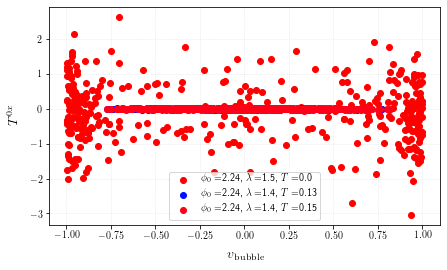

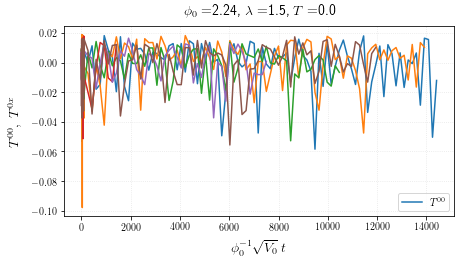

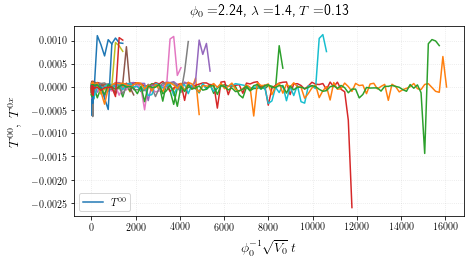

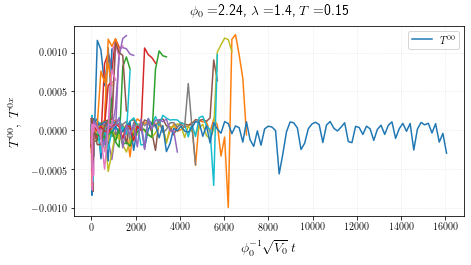

In [21]:
if True:
    cmap = get_cmap(4)
    cmap1 = get_cmap(3)
    fig1, ax0 = plt.subplots(1, 1, figsize=(7, 4))
    
    for tmp, temp in enumerate(tempList):
        if tmp==1: continue
    
        temp = tempList[tmp]
        lamb = lambList[tmp]
        sigmafld  = fluct_stdev(lamb, phi0, temp)
        labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
        print('Looking at at lambda, T, phi0, m2, sigma:', lamb, temp, phi0, m2(lamb), sigmafld)

        if tmp == 0: minSim, maxSim = 0, 2500
        elif tmp == 1: minSim, maxSim = 0, 3000
        elif tmp == 2: minSim, maxSim = 0, 2000
        elif tmp == 3: minSim, maxSim = 0, 2800

        tlist = [0]+np.linspace(1, 100, 100).tolist()+np.linspace(101, nTimeMAX-1, 100).tolist()
        tlist = np.asarray(tlist, dtype = 'int')

        allsims = np.load(tot_sims_cons_path(nLat, lamb, phi0, temp))
        energy_data = np.load(tot_en_cons_path(nLat, lamb, phi0, temp))
        momentum_data = np.load(tot_mom_cons_path(nLat, lamb, phi0, temp))
    #    powspec_data = np.load(tot_pspec_cons_path(nLat, lamb, phi0, temp))

        fig2, ax = plt.subplots(1, 1, figsize=(7, 3.5))
        for sim, (momentum, energy) in enumerate(zip(momentum_data, energy_data)):
            if sim%100==0:
                nx = len(momentum) - 1
          #      ax.plot(tlist[:nx], momentum[:nx] - np.mean(momentum), color=cmap1(1), label=(r'$T^{0x}$' if sim==0 else None))
          #      ax.plot(tlist[:nx], energy[:nx] - np.mean(energy), color=cmap1(2), label=(r'$T^{00}$' if sim==0 else None))
                ax.plot(tlist[:nx], energy[:nx] - np.mean(energy), label=(r'$T^{00}$' if sim==0 else None))
        ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; t$')
        ax.set_ylabel(r'$T^{00}, \; T^{0x}$')
        ax.legend(); ax.grid(ls=':', color='darkgray', alpha=0.3)
        ax.set_title(labs)
        fig2.show()

        veldata = np.load(velocities_bubbles_file(nLat, lamb, phi0, temp)+'.npy')
        simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]

        print('Bubble velocity data:', len(simvels), len(all_vels))
        print('Momentum data:', len(allsims), len(energy_data), len(momentum_data))

        simvels = np.sort(simvels)
        momsims = np.sort(allsims)
        indices = np.searchsorted(allsims, simvels)
        initmom = np.asarray([momentum_data[sim][0] for sim in range(len(allsims))])

        ax0.plot(all_vels, initmom[indices], marker='o', linestyle='None', color=cmap(tmp), label=labs)
        ax0.set_xlabel(r'$v_{\rm bubble}$')
        ax0.set_ylabel(r'$T^{0x}$')
        ax0.legend()
        ax0.grid(ls=':', color='darkgray', alpha=0.3)


In [22]:
nTimeMAX

16384

In [5]:
if False:
    for tmp, temp in enumerate(tempList):

        if tmp == 0: minSim, maxSim = 0, 2500
        elif tmp == 1: minSim, maxSim = 0, 3000
        elif tmp == 2: minSim, maxSim = 0, 2000
        elif tmp == 3: minSim, maxSim = 0, 2800

        lamb=lambList[tmp]
        sigmafld=fluct_stdev(lamb, phi0, temp)
        print('Looking at at lambda, T, phi0, m2, sigma:', lamb, temp, phi0, m2(lamb), sigmafld)

        ### Useful
        right_Vmax  = sco.minimize_scalar(Vinv, args=lamb, bounds=(np.pi, 2*np.pi), method='bounded')
        left_Vmax   = sco.minimize_scalar(Vinv, args=lamb, bounds=(0    ,   np.pi), method='bounded')
        crit_thresh = right_Vmax.x+2.*sigmafld

        win = 300
        critSize = 30

        all_vels = []
        for sim in range(minSim, maxSim):
            path_clean_sim = clean_sim_location(nLat, lamb, phi0, temp, sim)
            loc_rest_bub = bubble_at_rest(nLat, lamb, phi0, temp, sim)+'.npy'
            if os.path.exists(loc_rest_bub):
                sim, real, totalvCOM, finalv = np.load(loc_rest_bub)
                all_vels.append(np.asarray([sim, totalvCOM]))
            np.save(velocities_bubbles_file(nLat, lamb, phi0, temp), np.asarray(all_vels))
 